# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

****************************************************************************************************************************************************************


***

### 1. Exploración de datos y Procesamiento del Lenguaje Natural

####1.1 Importación y transformación de archivos

En primer lugar se proceden a importar los archivos train, dev y test disponibles en formato json, para visualizarlos como dataframes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/dataset_es_train.json"
path_2 = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/dataset_es_test.json"
path_3 = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/dataset_es_dev.json"

Se importan las librerías necesarias para iniciar el análisis exploratorio

In [3]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import json


In [4]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
dataset_train = pd.read_json(path, lines = True)
dataset_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [6]:
dataset_test = pd.read_json(path_2, lines = True)
dataset_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [7]:
dataset_dev= pd.read_json(path_3, lines = True)
dataset_dev.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


Se descarga la librería spaCy con su modelo "es_core_news_sm" para trabajar en español, que es el idioma en el que se presentan las reviews.

In [8]:
!pip install spacy

In [17]:
!spacy download es_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [18]:
import spacy 
import es_core_news_sm
nlp = es_core_news_sm.load()

Se importa y se presenta la lista de stopwords en español que usaremos posteriormente

In [ ]:
spacy_stopwords = nlp.Defaults.stop_words

In [ ]:
print(spacy_stopwords)

{'mejor', 'pueden', 'tras', 'haciendo', 'para', 'de', 'aquél', 'señaló', 'mío', 'nada', 'muchas', 'intento', 'nosotras', 'tenía', 'ademas', 'da', 'consigo', 'aqui', 'empleais', 'pasada', 'trabajais', 'sin', 'total', 'podriamos', 'dieron', 'alguno', 'como', 'diferente', 'trabajar', 'cuanta', 'nuestra', 'pues', 'podrán', 'soy', 'días', 'del', 'estas', 'desde', 'esto', 'intenta', 'verdadera', 'siete', 'mucho', 'allí', 'podrias', 'trabaja', 'algo', 'teneis', 'últimos', 'qeu', 'temprano', 'podría', 'ése', 'su', 'manera', 'mucha', 'míos', 'porque', 'usas', 'ambos', 'algunas', 'las', 'quizá', 'vuestro', 'cuáles', 'tienen', 'vuestra', 'aún', 'detras', 'vamos', 'habrá', 'algunos', 'trabajamos', 'tuyo', 'cuándo', 'debe', 'existen', 'poder', 'enfrente', 'tenemos', 'alrededor', 'habia', 'una', 'sería', 'arriba', 'solo', 'habían', 'nuevo', 'me', 'estos', 'ha', 'realizó', 'ello', 'estar', 'mal', 'está', 'ahí', 'lado', 'le', 'consiguen', 'día', 'tuya', 'tendrán', 'existe', 'embargo', 'ustedes', 'detr

Dejamos solamente las columnas 'review_body' y 'stars' de los archivos train, test y dev

In [ ]:
dataset_train = dataset_train[['review_body','stars']]
dataset_train.dropna(axis=0,inplace=True)  # Si hay algun nulo,se elimina la fila
dataset_train.head()

,review_body,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,1
1,"Horrible, nos tuvimos que comprar otro porque ...",1
2,Te obligan a comprar dos unidades y te llega s...,1
3,"No entro en descalificar al vendedor, solo pue...",1
4,Llega tarde y co la talla equivocada,1


In [ ]:
dataset_test = dataset_test[['review_body','stars']]
dataset_test.dropna(axis=0,inplace=True)  # Si hay algun nulo,se elimina la fila
dataset_test.head()

,review_body,stars
0,no me llego el articulo me lo mando por correo...,1
1,"la mensajería horrible, no compro mas",1
2,Estoy muy decepcionado con el vendedor ya que ...,1
3,Mi valoración no es sobre el producto sino sob...,1
4,Pues tenía interés en este libro y probé la ve...,1


In [ ]:
dataset_dev = dataset_dev[['review_body','stars']]
dataset_dev.dropna(axis=0,inplace=True)  # Si hay algun nulo,se elimina la fila
dataset_dev.head()

,review_body,stars
0,"Malisimo, muy grande demasiado aparatoso y mal...",1
1,No he recibido el pedido no la devolución,1
2,"Tengo que buscar otro sistema, este no funcion...",1
3,Utilicé las brocas de menor diámetro y se me d...,1
4,No me gusta su olor a viejo y aspecto malo,1


####1.2 Palabras más frecuentes

Ahora que tenemos los archivos organizados en dataframes y tenemos las librerías que usaremos en el procesamiento, identificamos cuáles son las palabras más frecuentes en el archivo train, según cada la cantidad de estrellas asignadas por el usuario.

Comenzamos separando las reviews en distintos dataframes según la cantidad de estrellas que tienen (1, 2, 3, 4 o 5):

In [ ]:
dataset_train_star_1 = dataset_train[dataset_train.stars == 1]
dataset_train_star_2 = dataset_train[dataset_train.stars == 2]
dataset_train_star_3 = dataset_train[dataset_train.stars == 3]
dataset_train_star_4 = dataset_train[dataset_train.stars == 4]
dataset_train_star_5 = dataset_train[dataset_train.stars == 5]

In [ ]:
dataset_train_star_1.head()

,review_body,stars
0,Nada bueno se me fue ka pantalla en menos de 8...,1
1,"Horrible, nos tuvimos que comprar otro porque ...",1
2,Te obligan a comprar dos unidades y te llega s...,1
3,"No entro en descalificar al vendedor, solo pue...",1
4,Llega tarde y co la talla equivocada,1


In [ ]:
dataset_train_star_2.head()

,review_body,stars
40000,"Los tornillos no ajustan bien, se caen. No lo ...",2
40001,Si haces varias impresiones seguidas aparecen ...,2
40002,es pequeño no coincide con la pantalla del a1,2
40003,No lleva nada para trasportarla y es un poco r...,2
40004,"a ver si me explico , su software reconoce las...",2


In [ ]:
dataset_train_star_3.head()

,review_body,stars
80000,"cabe bien un móvil de 5,5 y cumple su función ...",3
80001,El aparato tiene un tamaño perfecto. Y la embo...,3
80002,"La luces llegaron en tiempo y bien, las ocho f...",3
80003,"No sé puede apagar, está todo el rato consumie...",3
80004,Vino sin la goma ajustable en la tapa y si pon...,3


In [ ]:
dataset_train_star_4.head()

,review_body,stars
120000,"Tiene buena pinta, veremos el resultado",4
120001,Entrega rápida como siempre pero falta factura,4
120002,Está bien y envío rápido,4
120003,"Queda muy bien, material duradero y tamaño per...",4
120004,Genial aunque huele mucho a pegamento,4


In [ ]:
dataset_train_star_5.head()

,review_body,stars
160000,Es muy práctico para cuando me voy de vacacion...,5
160001,Cumple su función calidad precio bien. Buen ma...,5
160002,Perfecto.. Es lo que buscaba,5
160003,"MUY BUENA RELACIÓN CALIDAD-PRECIO, ES SILENCIO...",5
160004,"a mi hija le encanta, aunque hubiera preferido...",5


Cada dataframe se transforma para obtener las respectivas listas de palabras, en lugar de tenerlas agrupadas como reviews. Para ello se aplica la tokenización de cada review, se eliminan las palabras indeseadas a través de la lista "spacy_stopwords"

In [ ]:
todos_review_star_1 = []
for i in range(dataset_train_star_1.shape[0]):
    review_1 = dataset_train_star_1.iloc[i].review_body #seleccionar la review
    review_1 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_1) # Tokenizar con RegexpTokenizer
    review_1 =  [d for d in review_1 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_1.append(review_1) #agregar el resultado a la lista

In [ ]:
todos_review_star_2 = []
for i in range(dataset_train_star_2.shape[0]):
    review_2 = dataset_train_star_2.iloc[i].review_body #seleccionar la review
    review_2 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_2) # Tokenizar con RegexpTokenizer
    review_2 =  [d for d in review_2 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_2.append(review_2) #agregar el resultado a la lista

In [ ]:
todos_review_star_3 = []
for i in range(dataset_train_star_3.shape[0]):
    review_3 = dataset_train_star_3.iloc[i].review_body #seleccionar la review
    review_3 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_3) # Tokenizar con RegexpTokenizer
    review_3 =  [d for d in review_3 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_3.append(review_3) #agregar el resultado a la lista

In [ ]:
todos_review_star_4 = []
for i in range(dataset_train_star_4.shape[0]):
    review_4 = dataset_train_star_4.iloc[i].review_body #seleccionar la review
    review_4 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_4) # Tokenizar con RegexpTokenizer
    review_4 =  [d for d in review_4 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_4.append(review_4) #agregar el resultado a la lista

In [ ]:
todos_review_star_5 = []
for i in range(dataset_train_star_5.shape[0]):
    review_5 = dataset_train_star_5.iloc[i].review_body #seleccionar la review
    review_5 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_5) # Tokenizar con RegexpTokenizer
    review_5 =  [d for d in review_5 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_5.append(review_5) #agregar el resultado a la lista

A continuación se convierten las listas de review por cada estrella en listas únicas, para obtener todas las palabras de todos los reviews. Luego con el método FreqDist de la librería NTLK se determinan cuales son las palabras más comunes y hacemos la organización de dichos resultados de mayor a menor:

In [ ]:
# Esta celda convierte una lista de listas en una unica lista, para obtener todas las palabras de todos los reviews
todos_review_star_1 = list(itertools.chain(*todos_review_star_1))
todos_review_star_2 = list(itertools.chain(*todos_review_star_2))
todos_review_star_3 = list(itertools.chain(*todos_review_star_3))
todos_review_star_4 = list(itertools.chain(*todos_review_star_4))
todos_review_star_5 = list(itertools.chain(*todos_review_star_5))


In [ ]:
#Mediante el método FreqDist se halla la frecuencia de palabras en cada una de las listas
freq_star_1 = nltk.FreqDist(todos_review_star_1)
freq_star_2 = nltk.FreqDist(todos_review_star_2)
freq_star_3 = nltk.FreqDist(todos_review_star_3)
freq_star_4 = nltk.FreqDist(todos_review_star_4)
freq_star_5 = nltk.FreqDist(todos_review_star_5)

In [ ]:
# Convertimos las listas halladas anteriormente en dataframes

df_star_1 = pd.DataFrame(list(freq_star_1.items()), columns = ["Word","Frequency"])
df_star_2 = pd.DataFrame(list(freq_star_2.items()), columns = ["Word","Frequency"])
df_star_3 = pd.DataFrame(list(freq_star_3.items()), columns = ["Word","Frequency"])
df_star_4 = pd.DataFrame(list(freq_star_4.items()), columns = ["Word","Frequency"])
df_star_5 = pd.DataFrame(list(freq_star_5.items()), columns = ["Word","Frequency"])


In [ ]:
# Ordenamos de mayor a menor por frecuencia
df_star_1.sort_values('Frequency',ascending=False, inplace = True)
df_star_2.sort_values('Frequency',ascending=False, inplace = True)
df_star_3.sort_values('Frequency',ascending=False, inplace = True)
df_star_4.sort_values('Frequency',ascending=False, inplace = True)
df_star_5.sort_values('Frequency',ascending=False, inplace = True)

In [ ]:
df_star_1.reset_index(drop = True, inplace=True)
df_star_1.head()

,Word,Frequency
0,y,35026
1,a,16234
2,No,13605
3,producto,6735
4,El,5266


In [ ]:
df_star_2.reset_index(drop = True, inplace=True)
df_star_2.head()

,Word,Frequency
0,y,35630
1,a,15896
2,No,9909
3,El,6745
4,La,5632


In [ ]:
df_star_3.reset_index(drop = True, inplace=True)
df_star_3.head()

,Word,Frequency
0,y,32213
1,a,13121
2,El,6466
3,No,6060
4,calidad,5462


In [ ]:
df_star_4.reset_index(drop = True, inplace=True)
df_star_4.head()

,Word,Frequency
0,y,33914
1,a,12076
2,calidad,6887
3,precio,6840
4,El,5104


In [ ]:
df_star_5.reset_index(drop = True, inplace=True)
df_star_5.head()

,Word,Frequency
0,y,41199
1,a,12690
2,calidad,7678
3,precio,5641
4,Muy,5413


Graficamos las palabras más frecuentes en las listas de reviews con 1, 2, 3, 4 y 5 estrellas

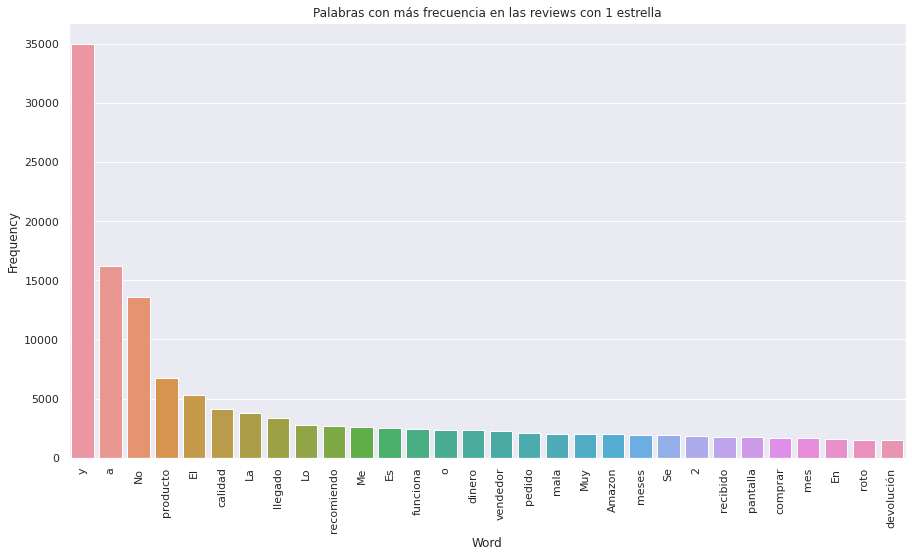

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_1.iloc[:30].Word, y = df_star_1.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)

plt.title("Palabras con más frecuencia en las reviews con 1 estrella")
plt.show()

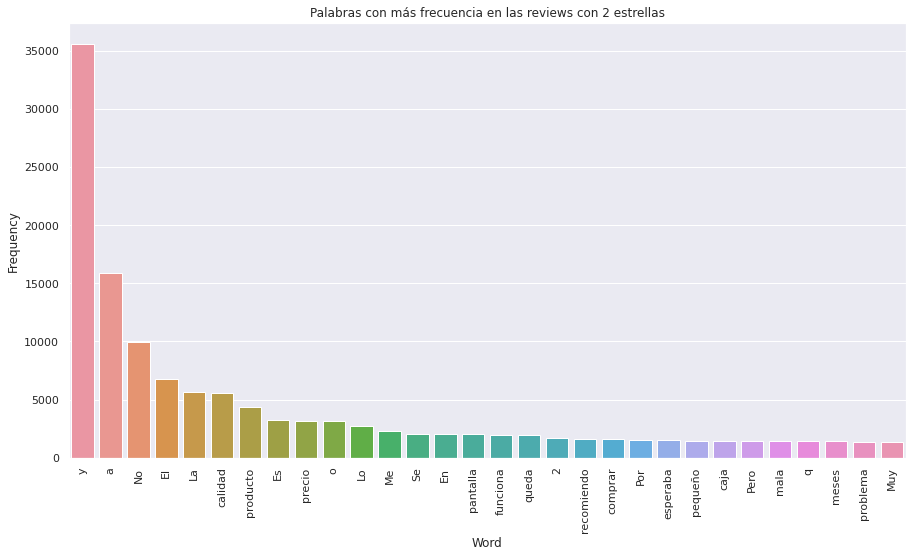

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_2.iloc[:30].Word, y = df_star_2.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Palabras con más frecuencia en las reviews con 2 estrellas")
plt.show()

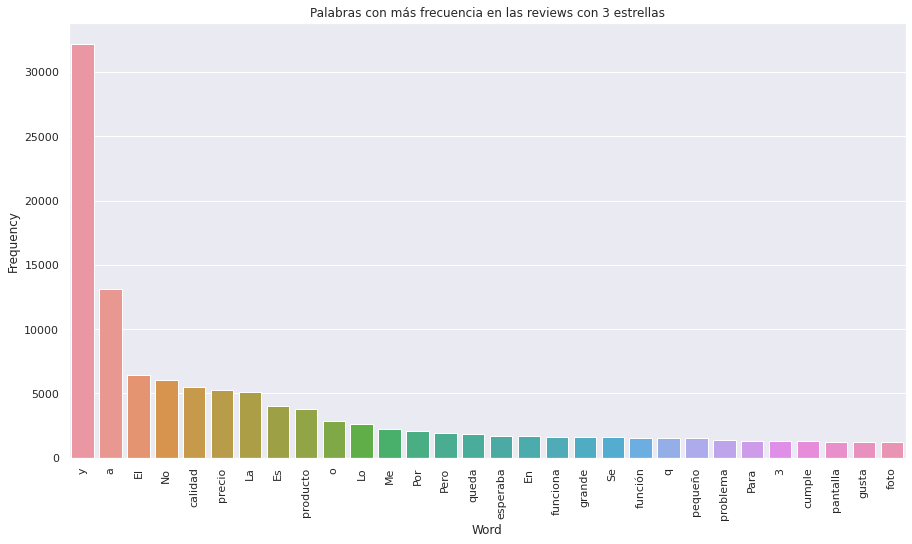

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_3.iloc[:30].Word, y = df_star_3.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Palabras con más frecuencia en las reviews con 3 estrellas")
plt.show()

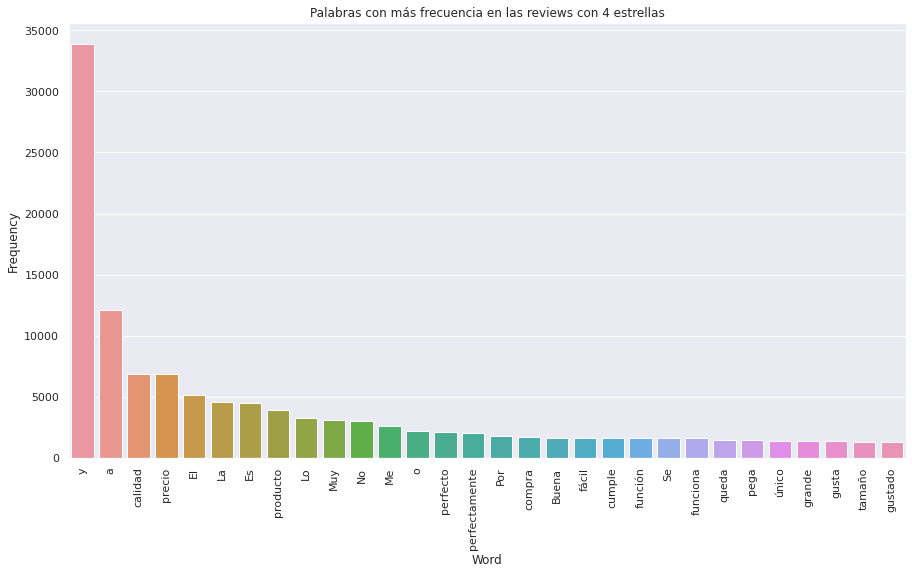

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_4.iloc[:30].Word, y = df_star_4.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Palabras con más frecuencia en las reviews con 4 estrellas")
plt.show()

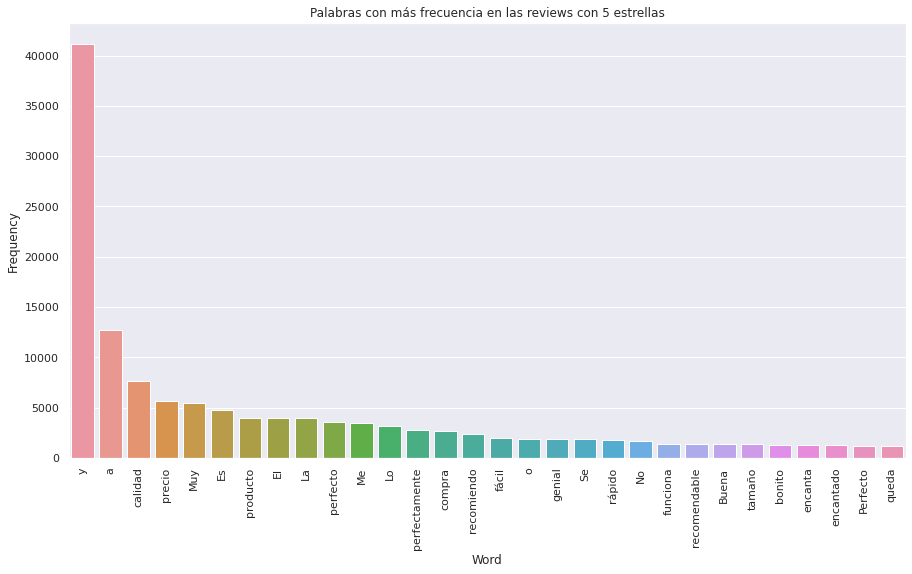

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_5.iloc[:30].Word, y = df_star_5.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Palabras con más frecuencia en las reviews con 5 estrellas")
plt.show()

En los gráficos presentados se observa una tendencia de palabras con connotaciones negativas en las listas de reviews de 1 y 2 estrellas ("mala", "roto", "devolución", "problema") mientras que en las reviews de 4 y 5 estrellas se observan palabras asociadas a opiniones positivas ("perfectamente", "buena", "fácil", "gusta", "genial", "bonito", "encantado", "recomendable"). Para las reviews de 3 estrellas no se observa una tendencia apreciable en cuanto a la predominancia de palabras positivas o negativas. Otro aspecto a destacar es la presencia en todas las gráficas de palabras como conectores y artículos que no brindan información adicional ("y", "la", "el", "no", "es", "a") las cuales serán removidas a continuación, cuando apliquemos los algoritmos para normalizar y lemmatizar.

####1.3 Normalización y lemmatización

Realizamos el proceso de normalización y lemmatización del archivo train

In [ ]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos la librería "re" que nos permite reemplazar caracteres
import re

In [ ]:
review_list=[]
for review in dataset_train.review_body:
    # Reemplazamos los caracteres que no sean letras por espacios. Aquí se incluyen en mayúscula y minúscula las vocales acentuadas, la letra ñ y la diéresis
    review = re.sub("[^a-zA-ZÁÉÍÓÚáéíóúÑñÜü]"," ",str(review))

    # Pasamos todo a minúsculas
    review = review.lower()

    # Tokenizamos para separar las palabras
    review = nlp(review)
    
    # Aplicamos el Lemmatizer
    review = [tok.lemma_.lower() for tok in review]
    
    # Eliminamos las palabras de menos de 3 letras
    review = [palabra for palabra in review if len(palabra)>3]

    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in spacy_stopwords]

    # Volvemos a unir la review
    review=" ".join(review)
    review_list.append(review)

Imprimimos el dataframe train con las reviews originales y sus reviews lemmatizadas

In [ ]:
dataset_train["review_lemm"] = review_list
dataset_train.head()

,review_body,stars,review_lemm
0,Nada bueno se me fue ka pantalla en menos de 8...,1,nadar pantalla mesar recibir respuesta fabricante
1,"Horrible, nos tuvimos que comprar otro porque ...",1,horrible comprar inglés informático hora capaz...
2,Te obligan a comprar dos unidades y te llega s...,1,obligar comprar unidad llegar formar reclamar ...
3,"No entro en descalificar al vendedor, solo pue...",1,entrar descalificar vendedor mesar esperar ...
4,Llega tarde y co la talla equivocada,1,llegar tardar tallar equivocar


Excluimos las reviews originales y dejamos el dataframe train solo con las lemmatizadas

In [ ]:
dataset_train_lemm = dataset_train[['review_lemm','stars']]
dataset_train_lemm.dropna(axis=0,inplace=True)  # Por si quedaron reviews vacios
dataset_train_lemm.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_lemm,stars
0,nadar pantalla mesar recibir respuesta fabricante,1
1,horrible comprar inglés informático hora capaz...,1
2,obligar comprar unidad llegar formar reclamar ...,1
3,entrar descalificar vendedor mesar esperar ...,1
4,llegar tardar tallar equivocar,1


Procesamos y lemmatizamos el archivo dev

In [ ]:
review_list_dev=[]
for review in dataset_dev.review_body:
    # Reemplazamos los caracteres que no sean letras por espacios. Aquí se incluyen en mayúscula y minúscula las vocales acentuadas, la letra ñ y la diéresis
    review = re.sub("[^a-zA-ZÁÉÍÓÚáéíóúÑñÜü]"," ",str(review))

    # Pasamos todo a minúsculas
    review = review.lower()

    # Tokenizamos para separar las palabras
    review = nlp(review)
    
    # Aplicamos el Lemmatizer 
    review = [tok.lemma_.lower() for tok in review]
    
    # Eliminamos las palabras de menos de 3 letras
    review = [palabra for palabra in review if len(palabra)>3]

    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in spacy_stopwords]

    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    review_list_dev.append(review)

Imprimimos el dataframe dev con las reviews originales y sus reviews lemmatizadas

In [ ]:
dataset_dev["review_lemm"] = review_list_dev
dataset_dev.head()

,review_body,stars,review_lemm
0,"Malisimo, muy grande demasiado aparatoso y mal...",1,malisimo grande demasiar aparatoso protector p...
1,No he recibido el pedido no la devolución,1,recibir pedir devolución
2,"Tengo que buscar otro sistema, este no funcion...",1,buscar sistema funcionar abrazadera parir agar...
3,Utilicé las brocas de menor diámetro y se me d...,1,utilizar broca menor diámetro doblar comer man...
4,No me gusta su olor a viejo y aspecto malo,1,gustar olor viejo aspecto malo


Excluimos las reviews originales y dejamos el dataframe dev solo con las lemmatizadas

In [ ]:
dataset_dev_lemm = dataset_dev[['review_lemm','stars']]
dataset_dev_lemm.dropna(axis=0,inplace=True)  # Por si quedaron reviews vacias
dataset_dev_lemm.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review_lemm,stars
0,malisimo grande demasiar aparatoso protector p...,1
1,recibir pedir devolución,1
2,buscar sistema funcionar abrazadera parir agar...,1
3,utilizar broca menor diámetro doblar comer man...,1
4,gustar olor viejo aspecto malo,1


####1.4 Vectorización

Se transforman los dataframes con las reviews train con las reviews normalizadas y lemmatizadas en listas, para proceder con la vectorización. 

In [ ]:

list_review_train = list(dataset_train_lemm['review_lemm'].values)
list_stars = list(dataset_train_lemm['stars'].values)


Usando la librería scikit learn importamos el vectorizador y lo instanciamos de tres formas, con hiperparámetros distintos en cada caso. El vectorizador base será usado para el modelo benchmark, solo tiene max_features=100 y no se usan los n-gramas. El Vectorizador 1 utiliza max_features=500 y ngram range de 1 a 2. El Vectorizador 2 utiliza max_features=1000 y ngram range de 1 a 3.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfIdfVectorizer_base=TfidfVectorizer(use_idf=True,max_features=100) #Instanciando vectorizador base
tfIdfVectorizer=TfidfVectorizer(use_idf=True,max_features=500,ngram_range = (1,2)) #Instanciando vectorizador 1
tfIdfVectorizer_2=TfidfVectorizer(use_idf=True,max_features=1000,ngram_range = (1,3)) #Instanciando vectorizador 2


Vectorizamos la lista de reviews train según los 3 vectorizadores definidos previamente, aplicando el método fit_transform

In [ ]:
tfIdf_train_base = tfIdfVectorizer_base.fit_transform(list_review_train)
tfIdf_train = tfIdfVectorizer.fit_transform(list_review_train)
tfIdf_train_2 = tfIdfVectorizer_2.fit_transform(list_review_train)

Se transforman los dataframes con las reviews dev con las reviews normalizadas y lemmatizadas en listas, para proceder con la vectorización.

In [ ]:
list_review_dev = list(dataset_dev_lemm['review_lemm'].values)
list_stars_dev = list(dataset_dev_lemm['stars'].values)

Vectorizamos la lista de reviews dev según los 3 vectorizadores definidos previamente, aplicando el método transform

In [ ]:
tfIdf_dev_base = tfIdfVectorizer_base.transform(list_review_dev)
tfIdf_dev = tfIdfVectorizer.transform(list_review_dev)
tfIdf_dev_2 = tfIdfVectorizer_2.transform(list_review_dev)


###2. Machine Learning

A continuación aplicaremos métodos de Machine Learning tales que dada la crítica de un producto, asigne la cantidad de estrellas correspondiente (1, 2, 3, 4 o 5). Por tanto los métodos que aplicaremos son de clasificación. Con el fin de evaluar el desempeño de los modelos, se utilizará la métrica de Accuracy score ya que es una de las más directas y fáciles de entender en el ámbito de los modelos de clasificación y adicionalmente es una métrica efectiva cuando las clases en los dataset se encuentran equilibradas, como ocurre en nuestro caso. Accuracy score se define como el porcentaje de elementos clasificados correctamente con respecto al total de predicciones.

####2.1 Modelo Benchmark

Para iniciar con la aplicación de Machine Learning creamos un modelo benchmark, que servirá como base para evaluar las mejoras con modelos mas avanzados y que incluyan optimización de los hiperparámetros. En este caso el benchmark es un modelo de arbol de decisión con los hiperparámetros por defecto, usando el vectorizador base que se definió en el punto 1.4.

Definimos las variables de entrenamiento (train) y validación (dev):

In [ ]:
x_train_base = tfIdf_train_base.toarray()
y_train = list_stars

x_dev_base = tfIdf_dev_base.toarray()
y_dev = list_stars_dev

Definimos y entrenamos el modelo de árbol de decisión:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train_base,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print("Accuracy score (train) para modelo benchmark: ", clf.score(x_train_base,y_train))
print("Accuracy score (dev) para modelo benchmark: ", clf.score(x_dev_base,y_dev))

Accuracy score (train) para modelo benchmark:  0.7404
Accuracy score (dev) para modelo benchmark:  0.3338


####2.2 Modelo con Vectorizador 1

Procedemos a implementar tres modelos de machine learning, modelando las variables de entrenamiento y validación a partir del Vectorizador 1 (max_features=500 y ngram_range=(1,2)). Se realizará optimización de hiperparámetros por Random Search.

In [ ]:
x_train = tfIdf_train.toarray()

In [ ]:
x_dev = tfIdf_dev.toarray()


#####2.2.1 Arbol de Decisión # 1

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(random_state=42)

In [ ]:
# Grilla para Random Search
param_grid_tree = {'max_depth':[5,50,500,1000]}

In [ ]:
model_tree = RandomizedSearchCV(tree, param_grid_tree,
        n_iter=2, random_state=42, cv=2)

model_tree.fit(x_train,y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
print("Mejores parametros: "+str(model_tree.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para el árbol de decisión 1: "+str(model_tree.best_score_)+'\n')    # Indica el mejor accuracy

scores_tree = pd.DataFrame(model_tree.cv_results_)
scores_tree

Mejores parametros: {'max_depth': 50}
Mejor accuracy score (train) para el árbol de decisión 1: 0.36187



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,18.008350,0.095805,0.153821,0.001246,50,{'max_depth': 50},0.36055,0.36319,0.361870,0.001320,1
1,27.398303,0.113981,0.180219,0.000988,1000,{'max_depth': 1000},0.34889,0.34654,0.347715,0.001175,2


In [ ]:
print("Accuracy score (dev) para modelo de árbol de decisión 1: ", model_tree.score(x_dev,y_dev))

Accuracy score (dev) para modelo de árbol de decisión 1:  0.3616


#####2.2.2 SVC #1 

In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC()

In [ ]:
# Grilla para Random Search
param_grid_svc = {'C':[0.01,0.1,1,10,20],'max_iter':[10000]}

In [ ]:
model_svc = RandomizedSearchCV(svc, param_grid_svc,
        n_iter=2, random_state=42, cv=2)

model_svc.fit(x_train,y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 20],
                                        'max_iter': [10000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print("Mejores parametros: "+str(model_svc.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para el SVC 1: "+str(model_svc.best_score_)+'\n')    # Indica el mejor score

scores_svc = pd.DataFrame(model_svc.cv_results_)
scores_svc

Mejores parametros: {'max_iter': 10000, 'C': 20}
Mejor accuracy score (train) para el SVC 1: 0.43637499999999996



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.203249,0.003766,0.247988,0.024721,10000,0.1,"{'max_iter': 10000, 'C': 0.1}",0.43715,0.43547,0.436310,0.000840,2
1,54.176182,1.340610,0.226763,0.001105,10000,20,"{'max_iter': 10000, 'C': 20}",0.43727,0.43548,0.436375,0.000895,1


In [ ]:

print("Accuracy score (dev) para modelo de SVC 1: ", model_svc.score(x_dev,y_dev))

Accuracy score (dev) para modelo de SVC 1:  0.4372


#####2.2.3 Regresión Logística #1

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [ ]:
# Grilla para Random Search
param_grid_log_reg = {'C':[0.01,0.1,1,10,20],'max_iter':[1000]}

In [ ]:
model_log_reg = RandomizedSearchCV(log_reg, param_grid_log_reg,
        n_iter=2, random_state=42, cv=2)

model_log_reg.fit(x_train,y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 20],
                                        'max_iter': [1000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print("Mejores parametros: "+str(model_log_reg.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para la regresión logística 1: "+str(model_log_reg.best_score_)+'\n')    # Indica el mejor score

scores_log_reg = pd.DataFrame(model_log_reg.cv_results_)
scores_log_reg

Mejores parametros: {'max_iter': 1000, 'C': 20}
Mejor accuracy score (train) para la regresión logística 1: 0.44135



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,40.755937,0.935572,0.228514,0.004532,1000,0.1,"{'max_iter': 1000, 'C': 0.1}",0.44101,0.43995,0.44048,0.00053,2
1,149.752215,2.916445,0.226481,0.000198,1000,20,"{'max_iter': 1000, 'C': 20}",0.44191,0.44079,0.44135,0.00056,1


In [ ]:
print("Accuracy score (dev) para modelo de regresión logística 1: ", model_log_reg.score(x_dev,y_dev))

Accuracy score (dev) para modelo de regresión logística 1:  0.4444


####2.3 Modelo con Vectorizador 2

In [ ]:
x_train_2 = tfIdf_train_2.toarray()

In [ ]:
x_dev_2 = tfIdf_dev_2.toarray()

#####2.3.1 Arbol de Decisión #2

In [ ]:
tree_2= DecisionTreeClassifier(random_state=42)

In [ ]:
# Grilla para Random Search
param_grid_tree_2 = {'max_depth':[5,50,500,1000]}

In [ ]:
model_tree_2 = RandomizedSearchCV(tree_2, param_grid_tree_2,
        n_iter=2, random_state=42, cv=2)

model_tree_2.fit(x_train_2,y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
print("Mejores parametros: "+str(model_tree_2.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para el árbol de decisión 2: "+str(model_tree_2.best_score_)+'\n')    # Indica el mejor score

scores_tree_2 = pd.DataFrame(model_tree_2.cv_results_)
scores_tree_2

Mejores parametros: {'max_depth': 50}
Mejor accuracy score (train) para el árbol de decisión 2: 0.364035



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,36.314568,0.507918,0.248162,0.002643,50,{'max_depth': 50},0.36428,0.36379,0.364035,0.000245,1
1,60.595833,1.451752,0.284121,0.002638,1000,{'max_depth': 1000},0.35518,0.34946,0.352320,0.002860,2


In [ ]:
print("Accuracy score (dev) para modelo de árbol de decisión 2: ", model_tree_2.score(x_dev_2,y_dev))

Accuracy score (dev) para modelo de árbol de decisión 2:  0.3682


#####2.3.2 SVC #2

In [ ]:
svc_2 = LinearSVC()

In [ ]:
# Grilla para Random Search
param_grid_svc_2 = {'C':[0.01,0.1,1,10,20],'max_iter':[10000]}

In [ ]:
model_svc_2 = RandomizedSearchCV(svc_2, param_grid_svc_2,
        n_iter=2, random_state=42, cv=2)

model_svc_2.fit(x_train_2,y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 20],
                                        'max_iter': [10000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print("Mejores parametros: "+str(model_svc_2.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para el SVC 2: "+str(model_svc_2.best_score_)+'\n')    # Indica el mejor score

scores_svc_2 = pd.DataFrame(model_svc_2.cv_results_)
scores_svc_2

Mejores parametros: {'max_iter': 10000, 'C': 0.1}
Mejor accuracy score (train) para el SVC 2: 0.44728500000000004



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.554368,0.001620,0.397586,0.000250,10000,0.1,"{'max_iter': 10000, 'C': 0.1}",0.44818,0.44639,0.447285,0.000895,1
1,53.157366,0.663001,0.402761,0.006245,10000,20,"{'max_iter': 10000, 'C': 20}",0.44738,0.44619,0.446785,0.000595,2


In [ ]:

print("Accuracy score (dev) para modelo de SVC 2: ", model_svc_2.score(x_dev_2,y_dev))

Accuracy score (dev) para modelo de SVC 2:  0.4378


#####2.3.3 Regresión Logística #2

In [ ]:
log_reg_2 = LogisticRegression(random_state=42)

In [ ]:
# Grilla para Random Search
param_grid_log_reg_2 = {'C':[0.01,0.1,1,10,20],'max_iter':[1000]}

In [ ]:
model_log_reg_2 = RandomizedSearchCV(log_reg_2, param_grid_log_reg_2,
        n_iter=2, random_state=42, cv=2)

model_log_reg_2.fit(x_train_2,y_train)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 20],
                                        'max_iter': [1000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print("Mejores parametros: "+str(model_log_reg_2.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para la regresión logística 2: "+str(model_log_reg_2.best_score_)+'\n')    # Indica el mejor score

scores_log_reg_2 = pd.DataFrame(model_log_reg_2.cv_results_)
scores_log_reg_2

Mejores parametros: {'max_iter': 1000, 'C': 0.1}
Mejor accuracy score (train) para la regresión logística 2: 0.45060500000000003



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,89.048652,2.881305,0.399816,0.000676,1000,0.1,"{'max_iter': 1000, 'C': 0.1}",0.45099,0.45022,0.450605,0.000385,1
1,483.789819,22.721587,0.396028,0.002490,1000,20,"{'max_iter': 1000, 'C': 20}",0.44958,0.44896,0.449270,0.000310,2


In [ ]:
print("Accuracy score (dev) para modelo de regresión logística 2: ", model_log_reg_2.score(x_dev_2,y_dev))

Accuracy score (dev) para modelo de regresión logística 2:  0.45


####2.4 Análisis de Resultados de modelos de ML (Opiniones que tienen 1 a 5 estrellas)

El árbol de decisión del modelo benchmark arrojó un accuracy train de 74.04 % y un accuracy dev de 33.38 %, lo cual es indicativo de overfitting y que es necesario aplicar modelos más complejos y optimizar los hiperparámetros. Después de implementar los modelos de Machine Learning, podemos ver que se pudo mejorar el valor de accuracy score con respecto al modelo benchmark.

Esta mejora es producto del uso de vectorizadores que tienen un aumento en max_features y la aplicación de ngram_range, así como de la optimización de los hiperparámetros por Random Search. De este modo el mejor resultado se obtuvo con el modelo de Regresión Logística con un valor de C = 0.1, utilizando el vectorizador #2, con un valor de accuracy train de 45.06 % y accuracy dev de 45.00 %

###3. Parte opcional: Opiniones positivas y negativas

En esta sección vamos a convertir el problema original de predicción de la cantidad de estrellas de una review a un problema binario, donde le asignamos la etiqueta positiva o negativa a cada review. Para efectos de simplificación, definimos que las opiniones de 1 y 2 estrellas son negativas, las de 4 y 5 estrellas son positivas y excluimos las opiniones de 3 estrellas al considerarlas neutrales. De este modo esperamos mejorar el accuracy score de los modelos de Machine Learning, ya que estamos agrupando clases que originalmente estaban categorizadas por separado.

####3.1 Transformación de los datos en un problema binario

#####3.1.1 Transformación dataset Train

Para el archivo train creamos un dataframe que le asigne a las reviews de 1 y 2 estrellas la nueva categoria "opinion" igual a 0 y a las reviews de 4 y 5 estrellas "opinion" igual a 1.

In [ ]:
dataset_train_lemm_neg = dataset_train_lemm[(dataset_train_lemm.stars == 1) | (dataset_train_lemm.stars == 2) ]
print(dataset_train_lemm_neg.shape)
dataset_train_lemm_neg.head()

(80000, 2)


,review_lemm,stars
0,nadar pantalla mesar recibir respuesta fabricante,1
1,horrible comprar inglés informático hora capaz...,1
2,obligar comprar unidad llegar formar reclamar ...,1
3,entrar descalificar vendedor mesar esperar ...,1
4,llegar tardar tallar equivocar,1


El dataframe "dataset_train_lemm_neg" contiene solamente las opiniones consideradas como negativas

In [ ]:
dataset_train_lemm_neg['opinion'] = 0
dataset_train_lemm_neg.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review_lemm,stars,opinion
0,nadar pantalla mesar recibir respuesta fabricante,1,0
1,horrible comprar inglés informático hora capaz...,1,0
2,obligar comprar unidad llegar formar reclamar ...,1,0
3,entrar descalificar vendedor mesar esperar ...,1,0
4,llegar tardar tallar equivocar,1,0


In [ ]:
dataset_train_lemm_pos = dataset_train_lemm[(dataset_train_lemm.stars == 4) | (dataset_train_lemm.stars == 5) ]
print(dataset_train_lemm_pos.shape)
dataset_train_lemm_pos.head()

(80000, 2)


,review_lemm,stars
120000,pintar resultar,4
120001,entregar rápido comer falto facturar,4
120002,enviar rápido,4
120003,quedo material duradero tamaño perfecto,4
120004,genial oler pegamento,4


El dataframe "dataset_train_lemm_pos" contiene solamente las opiniones consideradas como positivas

In [ ]:
dataset_train_lemm_pos['opinion'] = 1
dataset_train_lemm_pos.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review_lemm,stars,opinion
120000,pintar resultar,4,1
120001,entregar rápido comer falto facturar,4,1
120002,enviar rápido,4,1
120003,quedo material duradero tamaño perfecto,4,1
120004,genial oler pegamento,4,1


Concatenamos los dataframes "dataset_train_lemm_neg" y "dataset_train_lemm_pos" para obtener un solo dataframe "dataset_train_lemm_2" con opiniones positivas y negativas

In [ ]:
dataset_train_lemm_1 = pd.concat([dataset_train_lemm_neg,dataset_train_lemm_pos],axis=0)
dataset_train_lemm_2 = dataset_train_lemm_1.drop(columns=['stars'])
print(dataset_train_lemm_2.shape)
dataset_train_lemm_2.head()

(160000, 2)


,review_lemm,opinion
0,nadar pantalla mesar recibir respuesta fabricante,0
1,horrible comprar inglés informático hora capaz...,0
2,obligar comprar unidad llegar formar reclamar ...,0
3,entrar descalificar vendedor mesar esperar ...,0
4,llegar tardar tallar equivocar,0


#####3.1.2 Transformación dataset Dev

Para el archivo dev creamos un dataframe que le asigne a las reviews de 1 y 2 estrellas la nueva categoria "opinion" igual a 0 y a las reviews de 4 y 5 estrellas "opinion" igual a 1.

In [ ]:
dataset_dev_lemm_neg = dataset_dev_lemm[(dataset_dev_lemm.stars == 1) | (dataset_dev_lemm.stars == 2) ]
print(dataset_dev_lemm_neg.shape)
dataset_dev_lemm_neg.head()

(2000, 2)


,review_lemm,stars
0,malisimo grande demasiar aparatoso protector p...,1
1,recibir pedir devolución,1
2,buscar sistema funcionar abrazadera parir agar...,1
3,utilizar broca menor diámetro doblar comer man...,1
4,gustar olor viejo aspecto malo,1


El dataframe "dataset_dev_lemm_neg" contiene solamente las opiniones consideradas como negativas

In [ ]:
dataset_dev_lemm_neg['opinion'] = 0
dataset_dev_lemm_neg.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review_lemm,stars,opinion
0,malisimo grande demasiar aparatoso protector p...,1,0
1,recibir pedir devolución,1,0
2,buscar sistema funcionar abrazadera parir agar...,1,0
3,utilizar broca menor diámetro doblar comer man...,1,0
4,gustar olor viejo aspecto malo,1,0


In [ ]:
dataset_dev_lemm_pos = dataset_dev_lemm[(dataset_dev_lemm.stars == 4) | (dataset_dev_lemm.stars == 5) ]
print(dataset_dev_lemm_pos.shape)
dataset_dev_lemm_pos.head()

(2000, 2)


,review_lemm,stars
3000,robusto francamente cumplir cometer jugar llav...,4
3001,estupendo relación calidad preciar,4
3002,comprar parir madre contento compactar fácil n...,4
3003,estrechar valer parir parir pintura,4
3004,estrellar probar walkie funcionar perfe...,4


El dataframe "dataset_dev_lemm_pos" contiene solamente las opiniones consideradas como positivas

In [ ]:
dataset_dev_lemm_pos['opinion'] = 1
dataset_dev_lemm_pos.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review_lemm,stars,opinion
3000,robusto francamente cumplir cometer jugar llav...,4,1
3001,estupendo relación calidad preciar,4,1
3002,comprar parir madre contento compactar fácil n...,4,1
3003,estrechar valer parir parir pintura,4,1
3004,estrellar probar walkie funcionar perfe...,4,1


Concatenamos los dataframes "dataset_dev_lemm_neg" y "dataset_dev_lemm_pos" para obtener un solo dataframe "dataset_dev_lemm_2" con opiniones positivas y negativas

In [ ]:
dataset_dev_lemm_1 = pd.concat([dataset_dev_lemm_neg,dataset_dev_lemm_pos],axis=0)
dataset_dev_lemm_2 = dataset_dev_lemm_1.drop(columns=['stars'])
print(dataset_dev_lemm_2.shape)
dataset_dev_lemm_2.head()

(4000, 2)


,review_lemm,opinion
0,malisimo grande demasiar aparatoso protector p...,0
1,recibir pedir devolución,0
2,buscar sistema funcionar abrazadera parir agar...,0
3,utilizar broca menor diámetro doblar comer man...,0
4,gustar olor viejo aspecto malo,0


####3.2 Vectorización

Se transforman los dataframes train y dev con las reviews normalizadas y lemmatizadas en listas, para proceder con la vectorización. 

In [ ]:
list_review_train_op = list(dataset_train_lemm_2['review_lemm'].values)
list_train_opinion = list(dataset_train_lemm_2['opinion'].values)

list_review_dev_op = list(dataset_dev_lemm_2['review_lemm'].values)
list_dev_opinion = list(dataset_dev_lemm_2['opinion'].values)

Para efectos de simplificación realizamos solamente la vectorización con el Vectorizador Base y con el Vectorizador 2 el cual utiliza max_features=1000 y ngram range de 1 a 3 y fue el que se usó en la parte 2 para obtener el mejor accuracy score

In [ ]:
tfIdf_train_bench = tfIdfVectorizer_base.fit_transform(list_review_train_op)
tfIdf_dev_bench = tfIdfVectorizer_base.transform(list_review_dev_op)

tfIdf_train_op = tfIdfVectorizer_2.fit_transform(list_review_train_op)
tfIdf_dev_op = tfIdfVectorizer_2.transform(list_review_dev_op)

####3.3 Modelos de Machine Learning

A continuación aplicaremos métodos de Machine Learning tales que dada la crítica de un producto, asigne la categoría positiva o negativa. Por tanto los métodos que aplicaremos son de clasificación. Con el fin de evaluar el desempeño de los modelos, se utilizará la métrica de Accuracy score tal como se hizo en la parte 2.

#####3.3.1 Modelo Benchmark

Para iniciar con la aplicación de Machine Learning creamos un modelo benchmark, que servirá como base para evaluar las mejoras con modelos más avanzados y que incluyan optimización de los hiperparámetros. En este caso el benchmark es un modelo de arbol de decisión con los hiperparámetros por defecto, usando el vectorizador base

Definimos las variables de entrenamiento (train) y validación (dev):

In [ ]:
x_train_bench = tfIdf_train_bench.toarray()
y_train_op = list_train_opinion

x_dev_bench = tfIdf_dev_bench.toarray()
y_dev_op = list_dev_opinion

Definimos y entrenamos el modelo de arbol de decisión

In [ ]:
clf_bench = DecisionTreeClassifier(random_state=42)

clf.fit(x_train_bench,y_train_op)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print("Accuracy score (train) para modelo benchmark: ", clf.score(x_train_bench,y_train_op))
print("Accuracy score (dev) para modelo benchmark: ", clf.score(x_dev_bench,y_dev_op))

Accuracy score (train) para modelo benchmark:  0.891325
Accuracy score (dev) para modelo benchmark:  0.7175


#####3.3.2 Modelos con Vectorizador #2

Procedemos a implementar tres modelos de machine learning, modelando las variables de entrenamiento y validación a partir del Vectorizador 2 (max_features=1000 y ngram_range=(1,3)). Se realizará optimización de hiperparámetros por Random Search.

In [ ]:
x_train_op = tfIdf_train_op.toarray()
y_train_op = list_train_opinion

In [ ]:
x_dev_op = tfIdf_dev_op.toarray()
y_dev_op = list_dev_opinion

######3.3.2.1 Arbol de decisión

In [ ]:
tree_op = DecisionTreeClassifier(random_state=42)


In [ ]:
# Grilla para Random Search
param_grid_tree_op = {'max_depth':[5,50,500,1000]}

In [ ]:
model_tree_op = RandomizedSearchCV(tree_op, param_grid_tree_op,
        n_iter=2, random_state=42, cv=2)

model_tree_op.fit(x_train_op,y_train_op)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
print("Mejores parametros: "+str(model_tree_op.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para el árbol de decisión: "+str(model_tree_op.best_score_)+'\n')    # Indica el mejor score

scores_tree_op = pd.DataFrame(model_tree_op.cv_results_)
scores_tree_op

Mejores parametros: {'max_depth': 1000}
Mejor accuracy score (train) para el árbol de decisión: 0.714175



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,30.022617,3.100050,0.194126,0.000016,50,{'max_depth': 50},0.712912,0.677025,0.694969,0.017944,2
1,54.881059,3.535396,0.223944,0.000231,1000,{'max_depth': 1000},0.723113,0.705237,0.714175,0.008938,1


In [ ]:
print("Accuracy score (dev) para modelo de árbol de decisión 2: ", model_tree_op.score(x_dev_op,y_dev_op))

Accuracy score (dev) para modelo de árbol de decisión 2:  0.75725


######3.3.2.2 SVC

In [ ]:
svc_op = LinearSVC()

In [ ]:
# Grilla para Random Search
param_grid_svc_op = {'C':[0.01,0.1,1,10,20],'max_iter':[10000]}

In [ ]:
model_svc_op = RandomizedSearchCV(svc_op, param_grid_svc_op,
        n_iter=2, random_state=42, cv=2)

# Entrenamos: SVC con la grilla definida arriba y CV con tamaño de Fold=2
model_svc_op.fit(x_train_op,y_train_op)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 20],
                                        'max_iter': [10000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print("Mejores parametros: "+str(model_svc_op.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para el SVC: "+str(model_svc_op.best_score_)+'\n')    # Indica el mejor score

scores_svc_op = pd.DataFrame(model_svc_op.cv_results_)
scores_svc_op

Mejores parametros: {'max_iter': 10000, 'C': 20}
Mejor accuracy score (train) para el SVC: 0.7673749999999999



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.731521,0.008800,0.141612,0.000475,10000,0.1,"{'max_iter': 10000, 'C': 0.1}",0.780175,0.753000,0.766587,0.013587,2
1,6.318925,0.259433,0.141772,0.001646,10000,20,"{'max_iter': 10000, 'C': 20}",0.780075,0.754675,0.767375,0.012700,1


In [ ]:
print("Accuracy score (dev) para modelo de SVC: ", model_svc_op.score(x_dev_op,y_dev_op))

Accuracy score (dev) para modelo de SVC:  0.82425


######3.3.2.3 Regresión Logística

In [ ]:
log_reg_op = LogisticRegression(random_state=42)

In [ ]:
# Grilla para Random Search
param_grid_log_reg_op = {'C':[0.01,0.1,1,10,20],'max_iter':[1000]}

In [ ]:
model_log_reg_op = RandomizedSearchCV(log_reg_op, param_grid_log_reg_op,
        n_iter=2, random_state=42, cv=2)

# Entrenamos: Reg Log con la grilla definida arriba y CV con tamaño de Fold=2
model_log_reg_op.fit(x_train_op,y_train_op)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 20],
                                        'max_iter': [1000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print("Mejores parametros: "+str(model_log_reg_op.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para la regresión logística: "+str(model_log_reg_op.best_score_)+'\n')    # Indica el mejor score

scores_log_reg_op = pd.DataFrame(model_log_reg_op.cv_results_)
scores_log_reg_op

Mejores parametros: {'max_iter': 1000, 'C': 20}
Mejor accuracy score (train) para la regresión logística: 0.7682625000000001



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,4.143048,0.664246,0.140842,0.000975,1000,0.1,"{'max_iter': 1000, 'C': 0.1}",0.774725,0.740088,0.757406,0.017319,2
1,28.727050,3.847376,0.142263,0.000316,1000,20,"{'max_iter': 1000, 'C': 20}",0.780850,0.755675,0.768263,0.012588,1


In [ ]:
print("Accuracy score (dev) para modelo de regresión logística: ", model_log_reg_op.score(x_dev_op,y_dev_op))

Accuracy score (dev) para modelo de regresión logística:  0.824


####3.4 Análisis de Resultados de modelos de ML (Opiniones positivas y negativas)

El árbol de decisión del modelo benchmark arrojó un accuracy train de 89.13 % y un accuracy dev de 71.75 %, por lo cual es necesario aplicar modelos más complejos y optimizar los hiperparámetros y así disminuir el overfitting. Después de implementar los modelos de Machine Learning, podemos ver que se pudo mejorar el valor de accuracy score con respecto al modelo benchmark.

Esta mejora es producto del uso de vectorizadores que tienen un aumento en max_features y la aplicación de ngram_range, así como de la optimización de los hiperparámetros por Random Search. De este modo el mejor resultado se obtuvo con el modelo de SVC con un valor de C = 20 y max_iter=1000, utilizando el vectorizador #2, con un valor de accuracy train de 76.73 % y accuracy dev de 82.42 %

###4. Conclusiones

*   Al realizar el análisis exploratorio de los datos, se observó una tendencia en cuanto a la connotación de palabras encontradas según la calificación dada por el usuario. Para reviews con 1 y 2 estrellas hubo palabras con significado negativo entre las más frecuentes mientras que para las reviews con 4 y 5 estrellas hubo palabras con significado positivo. Para las reviews de 3 estrellas no hay una tendencia clara de palabras positivas o negativas.

*   Los modelos de Machine Learning para clasificar las reviews según el número de estrellas mostraron un 45% de accuracy score Dev en el mejor modelo, que fue el SVC con vectorizador #2, representando una mejora de casi 12% respecto al benchmark.

* Transformar el problema original en un problema binario con opiniones positivas y negativas, permitió obtener un accuracy score dev de 82.42 %, que representa un valor de 10.67% más que el modelo benchmark.

* El uso de mayor cantidad de max_features y un rango mas amplio de ngram_range estuvo directmamente asociado a una mejora en el accuracy score. Los modelos de Machine Learning utilizan la información dada por la vectorización, la cual organiza las palabras o conjuntos de palabras que tengan mayor puntaje tf-idf para definir los features.



###5. Recomendaciones

*   Incluir en el análisis la aplicación de los modelos de Machine Learning para el archivo Test, no solo para los archivos Train y Dev.

*   Importar modelos adicionales en español de la librería spaCy, como "es_core_news_md" o "es_core_news_lg".

*   Vectorizar utilizando un mayor número de max_features y ngram_range para evaluar si continua la mejora en el accuracy score.

* Aumentar la cantidad de iteraciones en el proceso de búsqueda de los mejores hiperparámetros a través de Random Search.

* Utilizar métodos más robustos para NLP, como Redes Neuronales.

* Variar la forma de transformación del problema original al problema binario, asignando las reviews de 3 estrellas a las opiniones positivas o a las opiniones negativas.

